In [1]:
#!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1upXO4eN0dP8qKb0LL9hxS-J13BpHl7Dk' -O 'tweets_combined.csv'
#!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1nPww8vxj9NDO1ddVce-PM3F4y3bD59Pl' -O 'price_combined.csv'
#!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1ka75BqQ65SPxD-zr8goJIzoKmLLw09Uw' -r -A 'uc*' -e robots=off -nd
#!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1XyK5SHgrbinev7SWlZQsJHVDW-OpzUFe' -O 'stock_tweet_lag3.csv'

# !wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1gGGhtDjxy2wFOuvxw7IYMeEHBIo8Knf4' -O 'test_data.csv'
# !wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1asswUWB0IY7O5RIzSUH5SA_YpfIHhknq' -O 'train_data.csv'
# !wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1GbmaCFGzNQ76fk-tpI7FsKUACOUfUtId' -O 'val_data.csv'

# !wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1doxGsW40zmSFcbAZHg2A_GTK6pE5qHi9' -O 'train_data_lag_3.csv'

# !wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=17jXW3GvEd7-luDsu2M_uAsj19t-6Zzho' -O 'val_data_lag_3.csv'

# !wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1-VtQGIZIukjak614Yo6G8WmNdRBQ3_20' -O 'test_data_lag_3.csv'

!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1NbH-3LL4bqKmunw388J037IJvXlr_kDW' -O 'train_data_lag_5.csv'

!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1hz_zmgWPN0mSczWV2m4aq9p4NRNdp4rD' -O 'val_data_lag_5.csv'

!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1v63Zbg5PizgCqhG9FopdO-i1iWuXFo8D' -O 'test_data_lag_5.csv'


--2021-12-21 20:56:56--  https://drive.google.com/uc?export=download&id=1NbH-3LL4bqKmunw388J037IJvXlr_kDW
Resolving drive.google.com (drive.google.com)... 74.125.197.139, 74.125.197.102, 74.125.197.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.197.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-18-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0qsn32k8eoacauf8rpes7n1s3ulivll1/1640120175000/14724390508833084599/*/1NbH-3LL4bqKmunw388J037IJvXlr_kDW?e=download [following]
--2021-12-21 20:56:59--  https://doc-0g-18-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0qsn32k8eoacauf8rpes7n1s3ulivll1/1640120175000/14724390508833084599/*/1NbH-3LL4bqKmunw388J037IJvXlr_kDW?e=download
Resolving doc-0g-18-docs.googleusercontent.com (doc-0g-18-docs.googleusercontent.com)... 74.125.197.132, 2607:f8b0:400e:c03::84
Connecting to doc-0g-18-docs.googleusercontent.com (doc-0g

In [2]:
!ls

sample_data  test_data_lag_5.csv  train_data_lag_5.csv	val_data_lag_5.csv


In [3]:
# !mv 'uc?export=download&confirm=sZ5j&id=1ka75BqQ65SPxD-zr8goJIzoKmLLw09Uw' 'twitter_sentiment_dataset.csv'
#!rm 'uc?export=download&id=1ka75BqQ65SPxD-zr8goJIzoKmLLw09Uw'

In [4]:
#New One



# New Section

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
%matplotlib inline
sns.set(color_codes=True)

In [6]:
#df = pd.read_csv('twitter_sentiment_dataset.csv', encoding='latin-1', header = None)
df = pd.read_csv('train_data_lag_5.csv', encoding='latin-1',lineterminator='\n')

df.columns=['stock_date', 'movement percent', 'stock_symbol', 'market_binary', 'tweet']
df = df.drop(columns=['stock_date', 'movement percent', 'stock_symbol'], axis=1)

df_validation= pd.read_csv('val_data_lag_5.csv', encoding='latin-1',lineterminator='\n')
df_validation.columns=['stock_date', 'movement percent', 'stock_symbol', 'market_binary', 'tweet']
df_validation = df_validation.drop(columns=['stock_date', 'movement percent', 'stock_symbol'], axis=1)

In [7]:
df.head()

,market_binary,tweet
0,0.0,$ aapl - wall st . kicks off new year on lower...
1,0.0,$ aep top analyst upgrades and downgrades : ap...
2,1.0,rt AT_USER impressive data from $ amgn and ucb...
3,1.0,$ bac bank of america corp ( bac ): 2 big bank...
4,0.0,$ bhp - will shell â s ambitious floating ln...


In [8]:
df['market_binary'] = df['market_binary'].apply(int)
df_validation['market_binary'] = df_validation['market_binary'].apply(int)

In [9]:
!ls
df.head()

sample_data  test_data_lag_5.csv  train_data_lag_5.csv	val_data_lag_5.csv


,market_binary,tweet
0,0,$ aapl - wall st . kicks off new year on lower...
1,0,$ aep top analyst upgrades and downgrades : ap...
2,1,rt AT_USER impressive data from $ amgn and ucb...
3,1,$ bac bank of america corp ( bac ): 2 big bank...
4,0,$ bhp - will shell â s ambitious floating ln...


In [10]:
df.shape

(14981, 2)

In [11]:
# df = df.sample(frac=1)
# positive = df[df['market_binary']==1][:8000]
# negative = df[df['market_binary']==0][:8000]
# df = positive.append(negative)
# df = df.sample(frac=1)

In [12]:
import re

hashtags = re.compile(r"^#\S+|\s#\S+")
mentions = re.compile(r"^@\S+|\s@\S+")
urls = re.compile(r"https?://\S+")

def process_text(text):
    text = re.sub(r'http\S+', '', text)
    text = hashtags.sub(' hashtag', text)
    text = mentions.sub(' entity', text)
    return text.strip().lower()


In [13]:
df.head()
#positive.head()
#negative.head()

#data_frame_normalized = positive
#data_frame_normalized = data_frame_normalized.append(negative)
train_normalized = df.copy()
val_normalized = df_validation.copy()

train_normalized['tweet'] = train_normalized.tweet.apply(process_text)
val_normalized['tweet'] = val_normalized.tweet.apply(process_text)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


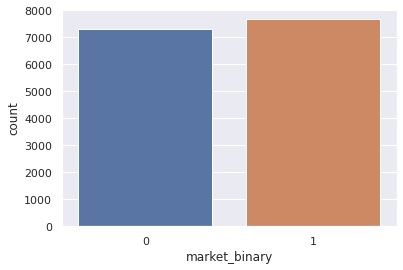

In [14]:
sns.countplot(train_normalized.market_binary)
# data_frame_normalized.shape

In [15]:
train_normalized['market_binary'] = train_normalized.market_binary.replace(1,'pos')
train_normalized['market_binary'] = train_normalized.market_binary.replace(0, 'neg')

val_normalized['market_binary'] = val_normalized.market_binary.replace(1,'pos')
val_normalized['market_binary'] = val_normalized.market_binary.replace(0, 'neg')

In [16]:
train_normalized.head()

,market_binary,tweet
0,neg,$ aapl - wall st . kicks off new year on lower...
1,neg,$ aep top analyst upgrades and downgrades : ap...
2,pos,rt at_user impressive data from $ amgn and ucb...
3,pos,$ bac bank of america corp ( bac ): 2 big bank...
4,neg,$ bhp - will shell â s ambitious floating ln...


In [17]:
train_normalized.shape

(14981, 2)

In [18]:
# import re

# hashtags = re.compile(r"^#\S+|\s#\S+")
# mentions = re.compile(r"^@\S+|\s@\S+")
# urls = re.compile(r"https?://\S+")

# def process_text(text):
#     text = re.sub(r'http\S+', '', text)
#     text = hashtags.sub(' hashtag', text)
#     text = mentions.sub(' entity', text)
#     return text.strip().lower()

In [19]:
# data_frame_normalized['tweet'] = data_frame_normalized.tweet.apply(process_text)

In [20]:
train_normalized.head


<bound method NDFrame.head of       market_binary                                              tweet
0               neg  $ aapl - wall st . kicks off new year on lower...
1               neg  $ aep top analyst upgrades and downgrades : ap...
2               pos  rt at_user impressive data from $ amgn and ucb...
3               pos  $ bac bank of america corp ( bac ): 2 big bank...
4               neg  $ bhp - will shell â s ambitious floating ln...
...             ...                                                ...
14976           pos  $ sre : shares of sempra energy ( nyse : sre )...
14977           pos  valuation analysis for unitedhealth group inc ...
14978           pos  earnings releases for july 28th ( before the o...
14979           neg  vrx valeant pharmaceuticals intl , inc . 52wk ...
14980           neg  regardless of where oil prices land next , the...

[14981 rows x 2 columns]>

In [21]:
val_normalized.head

<bound method NDFrame.head of      market_binary                                              tweet
0              neg  $ goog has no such power over $ aapl . the nex...
1              neg  $ abb received a new alert . find out why at u...
2              neg  sanm sanmina corp . day high url $ sanm $ amgn...
3              neg  bac bank of america corp . short sales url $ b...
4              neg  xiu.to ishares cdn s & p / tsx 60 index fund s...
...            ...                                                ...
1976           pos  $ utx - lenel , alertenterprise announce strat...
1977           pos  4 high - $ v $ wri $ unp $ glw url url v vangu...
1978           pos  $ wfc : analyst action by macquarie on wells f...
1979           pos  ( $ nxtd ) announces former ceo of ( $ wmt ) h...
1980           pos  pbf energy buys torrancerefinery in bid for na...

[1981 rows x 2 columns]>

In [22]:
from sklearn.model_selection import train_test_split
# train, test = train_test_split(data_frame_normalized, test_size = 0.1,random_state = 12 )

In [23]:
# data_frame_normalized.to_csv('data_sample.csv',index=False)
train_normalized.to_csv('train_sample.csv',index=False)
val_normalized.to_csv('val_sample.csv',index=False)

In [24]:
!pip install -q git+https://github.com/huggingface/transformers.git
!pip install -q git+https://github.com/gmihaila/ml_things.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 61 kB 543 kB/s 
     |████████████████████████████████| 596 kB 16.6 MB/s 
     |████████████████████████████████| 3.3 MB 65.9 MB/s 
     |████████████████████████████████| 895 kB 69.2 MB/s 
     |████████████████████████████████| 64 kB 2.3 MB/s 
     |████████████████████████████████| 11.2 MB 17.0 MB/s 
     |████████████████████████████████| 890 kB 82.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [25]:
torch.cuda.empty_cache()

In [26]:
import io
import os
import torch
from tqdm.notebook import tqdm
from torch.utils.data import Dataset, DataLoader
from ml_things import plot_dict, plot_confusion_matrix, fix_text
from sklearn.metrics import classification_report, accuracy_score
from transformers import (set_seed,
                          TrainingArguments,
                          Trainer,
                          GPT2Config,
                          GPT2Tokenizer,
                          AdamW, 
                          get_linear_schedule_with_warmup,
                          GPT2ForSequenceClassification)

set_seed(123)


epochs = 4

batch_size = 10
max_length = 512

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model_name_or_path = 'gpt2'
labels_ids = {'neg': 0, 'pos': 1}
n_labels = len(labels_ids)


In [27]:
class MovieReviewsDataset(Dataset):
  

  def __init__(self, filename, use_tokenizer):

    self.texts = []
    self.labels = []

    df = pd.read_csv(filename, lineterminator='\n')
    self.texts = df['tweet'].tolist()
    self.labels = df['market_binary'].tolist()

    # Number of exmaples.
    self.n_examples = len(self.labels)
    

    return

  def __len__(self):
    
    return self.n_examples

  def __getitem__(self, item):
    
    return {'text':self.texts[item],
            'label':self.labels[item]}



class Gpt2ClassificationCollator(object):
    
    def __init__(self, use_tokenizer, labels_encoder, max_sequence_len=None):

        # Tokenizer to be used inside the class.
        self.use_tokenizer = use_tokenizer
        # Check max sequence length.
        self.max_sequence_len = use_tokenizer.model_max_length if max_sequence_len is None else max_sequence_len
        # Label encoder used inside the class.
        self.labels_encoder = labels_encoder

        return

    def __call__(self, sequences):
        
       

        texts = [sequence['text'] for sequence in sequences]
  
        labels = [sequence['label'] for sequence in sequences]
       
        labels = [self.labels_encoder[label] for label in labels]

        inputs = self.use_tokenizer(text=texts, return_tensors="pt", padding=True, truncation=True,  max_length=self.max_sequence_len)
        
        inputs.update({'labels':torch.tensor(labels)})

        return inputs

def train(dataloader, optimizer_, scheduler_, device_):
  
  global model

 
  predictions_labels = []
  true_labels = []
 
  total_loss = 0

  
  model.train()

  
  for batch in tqdm(dataloader, total=len(dataloader)):

    
    true_labels += batch['labels'].numpy().flatten().tolist()
    
    
    batch = {k:v.type(torch.long).to(device_) for k,v in batch.items()}
    
    
    model.zero_grad()

   
    outputs = model(**batch)

   
    loss, logits = outputs[:2]

    total_loss += loss.item()

    
    loss.backward()

   
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

  
    optimizer_.step()

    
    scheduler_.step()

    
    logits = logits.detach().cpu().numpy()

    
    predictions_labels += logits.argmax(axis=-1).flatten().tolist()

  
  avg_epoch_loss = total_loss / len(dataloader)
  
  
  return true_labels, predictions_labels, avg_epoch_loss



def validation(dataloader, device_):
  
  global model

 
  predictions_labels = []
  true_labels = []
 
  total_loss = 0


  model.eval()

 
  for batch in tqdm(dataloader, total=len(dataloader)):

   
    true_labels += batch['labels'].numpy().flatten().tolist()

    batch = {k:v.type(torch.long).to(device_) for k,v in batch.items()}

    with torch.no_grad():        

       
        outputs = model(**batch)
        loss, logits = outputs[:2]

        logits = logits.detach().cpu().numpy()
        total_loss += loss.item()
        
       
        predict_content = logits.argmax(axis=-1).flatten().tolist()

       
        predictions_labels += predict_content

 
  avg_epoch_loss = total_loss / len(dataloader)

 
  return true_labels, predictions_labels, avg_epoch_loss

In [28]:
# Get model configuration.
print('Loading configuraiton...')
model_config = GPT2Config.from_pretrained(pretrained_model_name_or_path=model_name_or_path, num_labels=n_labels)


print('Loading tokenizer...')
tokenizer = GPT2Tokenizer.from_pretrained(pretrained_model_name_or_path=model_name_or_path)
# default to left padding
tokenizer.padding_side = "left"
# Define PAD Token = EOS Token = 50256
tokenizer.pad_token = tokenizer.eos_token



print('Loading model...')
model = GPT2ForSequenceClassification.from_pretrained(pretrained_model_name_or_path=model_name_or_path, config=model_config)


model.resize_token_embeddings(len(tokenizer))
model.config.pad_token_id = model.config.eos_token_id

model.to(device)
print('Model loaded to `%s`'%device)

Loading configuraiton...


Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Loading tokenizer...


Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Loading model...


Downloading:   0%|          | 0.00/523M [00:00<?, ?B/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model loaded to `cuda`


In [29]:
gpt2_classificaiton_collator = Gpt2ClassificationCollator(use_tokenizer=tokenizer, 
                                                          labels_encoder=labels_ids, max_sequence_len = max_length 
                                                         )


print('Dealing with Train...')
# Create pytorch dataset.
train_dataset = MovieReviewsDataset(filename='train_sample.csv', 
                               use_tokenizer=tokenizer)
print('Created `train_dataset` with %d examples!'%len(train_dataset))


train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=gpt2_classificaiton_collator)
print('Created `train_dataloader` with %d batches!'%len(train_dataloader))

print()

print('Validation...')

valid_dataset =  MovieReviewsDataset(filename='val_sample.csv', 
                               use_tokenizer=tokenizer)
print('Created `valid_dataset` with %d examples!'%len(valid_dataset))


valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, collate_fn=gpt2_classificaiton_collator)
print('Created `eval_dataloader` with %d batches!'%len(valid_dataloader))

Dealing with Train...
Created `train_dataset` with 14981 examples!
Created `train_dataloader` with 1499 batches!

Validation...
Created `valid_dataset` with 1981 examples!
Created `eval_dataloader` with 199 batches!


In [30]:
torch.cuda.empty_cache()


In [31]:

optimizer = AdamW(model.parameters(),
                  lr = 3e-5, # default is 5e-5,
                  eps = 1e-8 
                  )


total_steps = len(train_dataloader) * epochs


scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 50, 
                                            num_training_steps = total_steps)


all_loss = {'train_loss':[], 'val_loss':[]}
all_acc = {'train_acc':[], 'val_acc':[]}

print('Epoch')
for epoch in tqdm(range(epochs)):
  print()
  print('Training on batches...')
  
  train_labels, train_predict, train_loss = train(train_dataloader, optimizer, scheduler, device)
  train_acc = accuracy_score(train_labels, train_predict)

  
  print('Validation on batches...')
  valid_labels, valid_predict, val_loss = validation(valid_dataloader, device)
  val_acc = accuracy_score(valid_labels, valid_predict)

  
  print("  train_loss: %.5f - val_loss: %.5f - train_acc: %.5f - valid_acc: %.5f"%(train_loss, val_loss, train_acc, val_acc))
  print()

  
  all_loss['train_loss'].append(train_loss)
  all_loss['val_loss'].append(val_loss)
  all_acc['train_acc'].append(train_acc)
  all_acc['val_acc'].append(val_acc)




Epoch


  0%|          | 0/4 [00:00<?, ?it/s]


Training on batches...


  0%|          | 0/1499 [00:00<?, ?it/s]

Validation on batches...


  0%|          | 0/199 [00:00<?, ?it/s]

  train_loss: 0.70643 - val_loss: 0.69477 - train_acc: 0.50771 - valid_acc: 0.46946


Training on batches...


  0%|          | 0/1499 [00:00<?, ?it/s]

Validation on batches...


  0%|          | 0/199 [00:00<?, ?it/s]

  train_loss: 0.69669 - val_loss: 0.69212 - train_acc: 0.51025 - valid_acc: 0.52852


Training on batches...


  0%|          | 0/1499 [00:00<?, ?it/s]

Validation on batches...


  0%|          | 0/199 [00:00<?, ?it/s]

  train_loss: 0.69383 - val_loss: 0.69333 - train_acc: 0.50771 - valid_acc: 0.48057


Training on batches...


  0%|          | 0/1499 [00:00<?, ?it/s]

Validation on batches...


  0%|          | 0/199 [00:00<?, ?it/s]

  train_loss: 0.69202 - val_loss: 0.69336 - train_acc: 0.51572 - valid_acc: 0.49066



/usr/local/lib/python3.7/dist-packages/ml_things/plot_functions.py:410: DeprecationWarning: `magnify` needs to have value in [0,1]! `1.2` will be converted to `0.1` as default.
  DeprecationWarning)


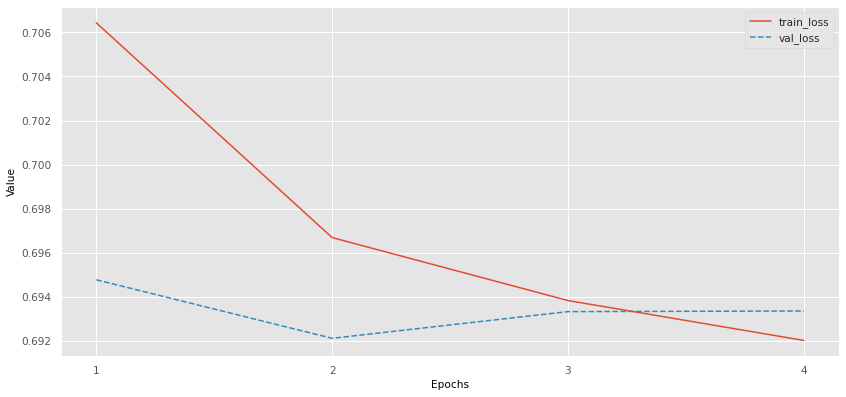

/usr/local/lib/python3.7/dist-packages/ml_things/plot_functions.py:410: DeprecationWarning: `magnify` needs to have value in [0,1]! `1.2` will be converted to `0.1` as default.
  DeprecationWarning)


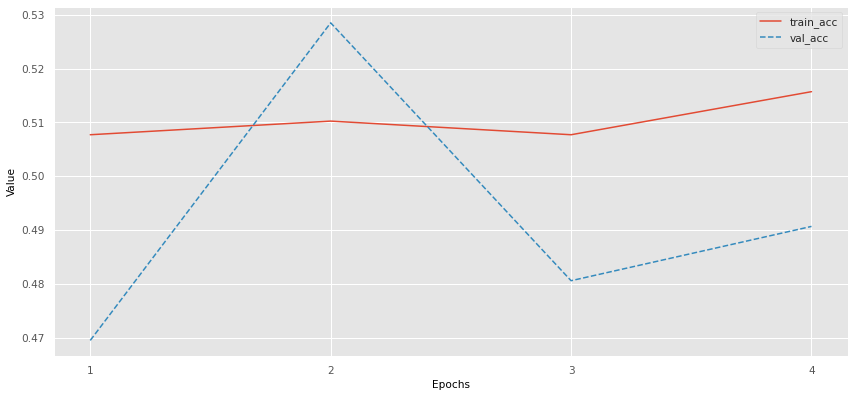

In [37]:
plot_dict(all_loss, use_xlabel='Epochs', use_ylabel='Value', use_linestyles=['-', '--'])

# Plot accuracy curves.
plot_dict(all_acc, use_xlabel='Epochs', use_ylabel='Value', use_linestyles=['-', '--'])

In [38]:
test = pd.read_csv('test_data_lag_5.csv', encoding='latin-1',lineterminator='\n')
test.columns=['stock_date', 'movement percent', 'stock_symbol', 'market_binary', 'tweet']
test = test.drop(columns=['stock_date', 'movement percent', 'stock_symbol'], axis=1)

test['market_binary'] = test['market_binary'].apply(int)
test.head
test_normalized = test.copy()
test_normalized['market_binary'] = test_normalized.market_binary.replace(1,'pos')
test_normalized['market_binary'] = test_normalized.market_binary.replace(0, 'neg')

test_normalized.head
test_normalized.to_csv('test_sample.csv', index=False)

test_dataset =  MovieReviewsDataset(filename='test_sample.csv', 
                               use_tokenizer=tokenizer)
print('Created `valid_dataset` with %d examples!'%len(test_dataset))
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=gpt2_classificaiton_collator)
print('Created `eval_dataloader` with %d batches!'%len(test_dataloader))


Created `valid_dataset` with 2737 examples!
Created `eval_dataloader` with 274 batches!


  0%|          | 0/274 [00:00<?, ?it/s]

              precision    recall  f1-score   support

         neg       0.48      0.51      0.50      1296
         pos       0.53      0.50      0.52      1441

    accuracy                           0.51      2737
   macro avg       0.51      0.51      0.51      2737
weighted avg       0.51      0.51      0.51      2737

Normalized confusion matrix


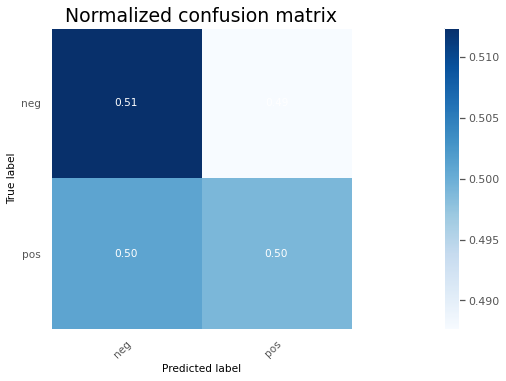

In [39]:

true_labels, predictions_labels, avg_epoch_loss = validation(test_dataloader, device)


evaluation_report = classification_report(true_labels, predictions_labels, labels=list(labels_ids.values()), target_names=list(labels_ids.keys()))

print(evaluation_report)

# Plot confusion matrix.
plot_confusion_matrix(y_true=true_labels, y_pred=predictions_labels, 
                      classes=list(labels_ids.keys()), normalize=True, 
                      magnify=0.1,
                      );


In [35]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(true_labels, predictions_labels)

0.011289783049976566

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


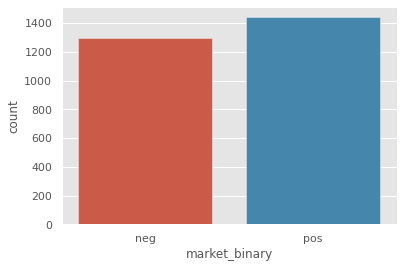

In [36]:
sns.countplot(test_normalized.market_binary)